In [1]:
# Import Statements
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [4]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        

def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


2022-07-27 21:02:18.753629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ammar/Documents/GitHub/Google-ML-Crash-Course/venv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 29170.9902 - root_mean_squared_error: 170.7952
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 27710.3867 - root_mean_squared_error: 166.4644
Epoch 3/30
567/567 [==============================] - 1s 998us/step - loss: 27249.4277 - root_mean_squared_error: 165.0740
Epoch 4/30
567/567 [==============================] - 0s 866us/step - loss: 26349.6621 - root_mean_squared_error: 162.3258
Epoch 5/30
567/567 [==============================] - 0s 843us/step - loss: 25585.2168 - root_mean_squared_error: 159.9538
Epoch 6/30
567/567 [==============================] - 0s 861us/step - loss: 24867.3496 - root_mean_squared_error: 157.6938
Epoch 7/30
567/567 [==============================] - 0s 819us/step - loss: 24320.7129 - root_mean_squared_error: 155.9510
Epoch 8/30
567/567 [==============================] - 0s 816us/step - loss: 23618.1445 - root_mean_squared_error: 153.6820
Epoch 9/30
567/567 [

/Users/ammar/Documents/GitHub/Google-ML-Crash-Course/venv/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


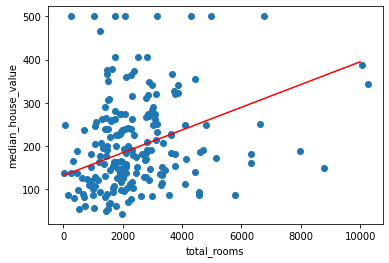

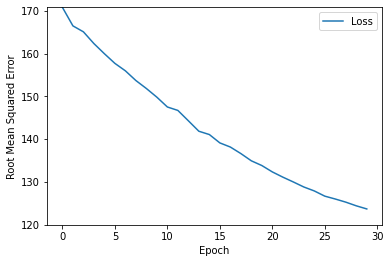

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [8]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [9]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             184
 3400     92             222
 3677     69             229
 2202     62             190
 2403     80             195
 5652    295             281
 3318    500             219
 2552    342             199
 1364    118             168
 3468    128             223


Epoch 1/18
5667/5667 [==============================] - 6s 1ms/step - loss: 42054.1602 - root_mean_squared_error: 205.0711
Epoch 2/18
5667/5667 [==============================] - 5s 800us/step - loss: 20693.0801 - root_mean_squared_error: 143.8509
Epoch 3/18
5667/5667 [==============================] - 5s 810us/step - loss: 18827.6973 - root_mean_squared_error: 137.2141
Epoch 4/18
5667/5667 [==============================] - 4s 791us/step - loss: 17876.3750 - root_mean_squared_error: 133.7026
Epoch 5/18
5667/5667 [==============================] - 5s 854us/step - loss: 18124.1992 - root_mean_squared_error: 134.6261
Epoch 6/18
5667/5667 [==============================] - 5s 802us/step - loss: 17955.9395 - root_mean_squared_error: 133.9998
Epoch 7/18
5667/5667 [==============================] - 5s 836us/step - loss: 18180.1719 - root_mean_squared_error: 134.8339
Epoch 8/18
5667/5667 [==============================] - 5s 912us/step - loss: 18268.6191 - root_mean_squared_error: 135.1615
Ep

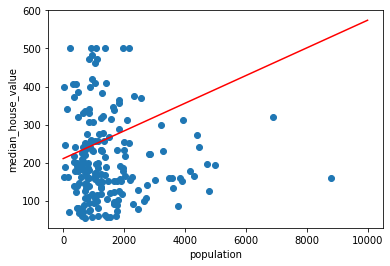

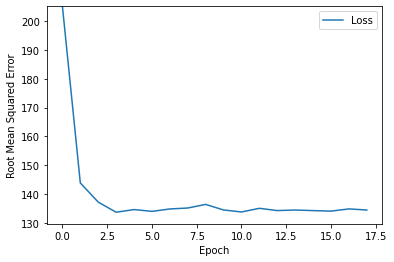

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             257
 1867     92             278
 2191     69             290
 1052     62             249
 1647     80             270
 2312    295             295
 1604    500             269
 1066    342             249
  338    118             223
 1604    128             269
 1200    187             254
  292     80             221
 2014    112             284
 1817     95             277
 1328     69             259


In [10]:
# Change hyperparameters to get better results.

my_feature = "population"   # Replace the ? with population or possibly a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

# Predicting using population is the same as total_room if not worse

Epoch 1/25
850/850 [==============================] - 1s 784us/step - loss: 35364.7344 - root_mean_squared_error: 188.0551
Epoch 2/25
850/850 [==============================] - 1s 750us/step - loss: 16772.9590 - root_mean_squared_error: 129.5105
Epoch 3/25
850/850 [==============================] - 1s 753us/step - loss: 15044.1992 - root_mean_squared_error: 122.6548
Epoch 4/25
850/850 [==============================] - 1s 875us/step - loss: 14924.4707 - root_mean_squared_error: 122.1657
Epoch 5/25
850/850 [==============================] - 1s 762us/step - loss: 14795.6182 - root_mean_squared_error: 121.6372
Epoch 6/25
850/850 [==============================] - 1s 841us/step - loss: 14585.8311 - root_mean_squared_error: 120.7718
Epoch 7/25
850/850 [==============================] - 1s 781us/step - loss: 14494.1602 - root_mean_squared_error: 120.3917
Epoch 8/25
850/850 [==============================] - 1s 789us/step - loss: 14377.0928 - root_mean_squared_error: 119.9045
Epoch 9/25
850/8

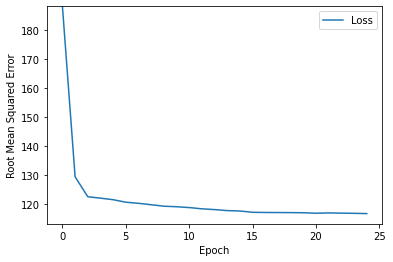

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             186
    2     92             199
    2     69             193
    2     62             211
    1     80             183
    2    295             227
    2    500             210
    2    342             224
    4    118             296
    2    128             214
    2    187             225
    3     80             237
    2    112             226
    2     95             220
    2     69             210


In [20]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.05
epochs = 25
batch_size = 20

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)